PROBLEM STATEMENT 3_ DEVANSHU TYAGI

In [ ]:
%autosave 10

Autosaving every 10 seconds

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
df=pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
df["default payment next month"].mean()

0.2217971797179718

In [5]:
df.groupby("default payment next month") ["ID"].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [6]:
X=df['LIMIT_BAL'].values.reshape(-1,1)
Y=df["default payment next month"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=24)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [9]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)

In [10]:
logistic.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [11]:
y_pred = logistic.predict(X_test)

In [12]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [14]:
logistic.score(X_test, y_test)
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test, y_pred)
print(accuracy*100)

78.34239639977498


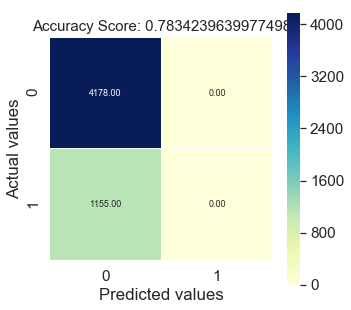

In [17]:
import seaborn as sns
confusionmatrix=metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(confusionmatrix, annot=True, annot_kws={"size": 9}, fmt=".2f", linewidths=.4, square=True,cmap= "YlGnBu")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
sns.set(font_scale=1.4)
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);
title='Accuracy_score'.format(accuracy)

In [23]:
y_pred_prob=logistic.predict_proba(X_test)
y_pred_prob

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

In [24]:
y_prob_sum = np.sum(y_pred_prob,1)
y_prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [25]:
y_prob_sum.shape

(5333,)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [26]:
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve
roc_auc_score(y_test,y_pred_prob[:,1])

0.6201990844642832

_________________________________________________________________________
**Now, plot the ROC curve.**


In [28]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob[:,1])

In [29]:
thresholds

array([1.48298465, 0.48298465, 0.46600867, 0.44911106, 0.4323301 ,
       0.415703  , 0.3992656 , 0.38305207, 0.3670946 , 0.35142324,
       0.33606566, 0.321047  , 0.30638978, 0.29211383, 0.27823623,
       0.26477132, 0.25173076, 0.23912359, 0.2269563 , 0.21523299,
       0.20395547, 0.19312344, 0.18273464, 0.17278502, 0.16326891,
       0.15417922, 0.14550758, 0.13724452, 0.12937966, 0.12190182,
       0.11479918, 0.10805946, 0.10166997, 0.09561779, 0.08988983,
       0.08447295, 0.07935404, 0.07452008, 0.0699582 , 0.06565578,
       0.06160044, 0.05778008, 0.05418298, 0.05079775, 0.04761337,
       0.04461922, 0.0418051 , 0.03916119, 0.03667808, 0.0343468 ,
       0.03215875, 0.03010574, 0.02817998, 0.02637405, 0.02468092,
       0.0230939 , 0.02021324, 0.01890793, 0.01654057, 0.01546869,
       0.01446524, 0.01033455, 0.00844134, 0.0078901 , 0.00644178])

Text(0.5, 1.0, 'ROC_Recieving Operation Characteristics curve -> Logistic_Regression with LIMIT_BAL')

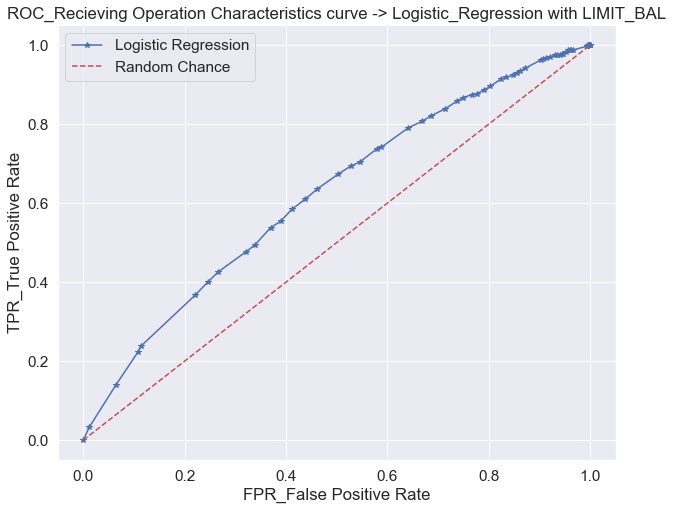

In [30]:
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,"*-")
plt.plot([0,1],[0,1],'r--')
plt.legend(["Logistic Regression","Random Chance"])
plt.xlabel("FPR_False Positive Rate")
plt.ylabel("TPR_True Positive Rate")
plt.title("ROC_Recieving Operation Characteristics curve -> Logistic_Regression with LIMIT_BAL")

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [31]:
from sklearn.metrics import precision_recall_curve,precision_score,precision_recall_fscore_support
precision,recall,threshold1=precision_recall_curve(y_test,y_pred_prob[:,1])

In [32]:
threshold1

array([0.0078901 , 0.00844134, 0.01033455, 0.01264696, 0.01446524,
       0.01546869, 0.01654057, 0.01890793, 0.02021324, 0.02160667,
       0.0230939 , 0.02468092, 0.02637405, 0.02817998, 0.03010574,
       0.03215875, 0.0343468 , 0.03667808, 0.03916119, 0.0418051 ,
       0.04461922, 0.04761337, 0.05079775, 0.05418298, 0.05778008,
       0.06160044, 0.06565578, 0.0699582 , 0.07452008, 0.07935404,
       0.08447295, 0.08988983, 0.09561779, 0.10166997, 0.10805946,
       0.11479918, 0.12190182, 0.12937966, 0.13724452, 0.14550758,
       0.15417922, 0.16326891, 0.17278502, 0.18273464, 0.19312344,
       0.20395547, 0.21523299, 0.2269563 , 0.23912359, 0.25173076,
       0.26477132, 0.27823623, 0.29211383, 0.30638978, 0.321047  ,
       0.33606566, 0.35142324, 0.3670946 , 0.38305207, 0.3992656 ,
       0.415703  , 0.4323301 , 0.44911106, 0.46600867, 0.48298465])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision & Recall Curve -> Logistic_Regression with LIMIT_BAL')

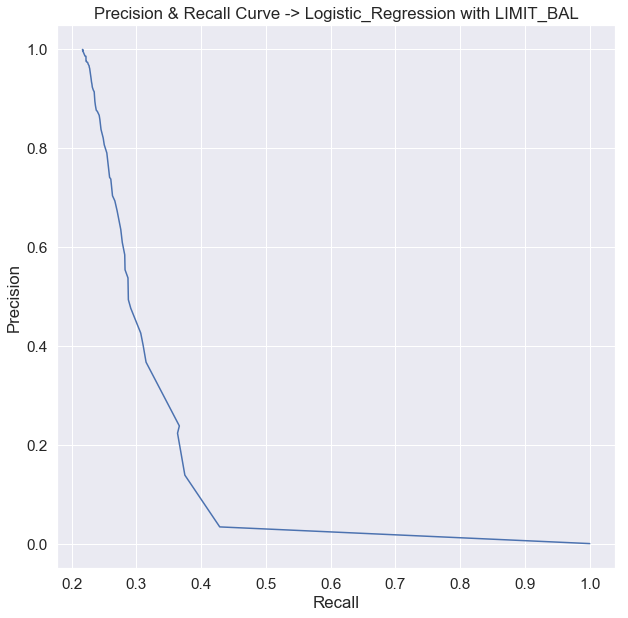

In [34]:
plt.figure(figsize=(10,10))
plt.plot(precision,recall)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision & Recall Curve -> Logistic_Regression with LIMIT_BAL")

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [35]:
from sklearn.metrics import auc
auc(recall,precision)

0.31566964427378624

In [36]:
roc_auc_score(y_test,y_pred_prob[:,1])

0.6201990844642832

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [38]:
xtrain_pred=logistic.predict(X_train)
xtrain_pred_prob=logistic.predict_proba(X_train)
xtrain_pred_prob

array([[0.69361022, 0.30638978],
       [0.78476701, 0.21523299],
       [0.94581702, 0.05418298],
       ...,
       [0.55088894, 0.44911106],
       [0.73522868, 0.26477132],
       [0.92064596, 0.07935404]])

    How is this different, conceptually and quantitatively, from your earlier calculation?


In [39]:
roc_auc_score(y_train,xtrain_pred_prob[:,1])

0.6182918113358344